# Исследование объявлений о продаже квартир

## Описание проекта

В распоряжении имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача - научиться определять рыночную стоимость объектов недвижимости. Задача анализа — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
# импорт библиотек
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

## Изучение данных

Прочитаем файл, посмотрим первые и последние 10 значений, общую информацию и статистическую информацию о датасете. Методом `.describe()` можем сразу обнаружить аномальные значения

In [2]:
# чтение данных и просмотр первых 10 строк
data = pd.read_csv('/Users/danilvlasenko/Desktop/projects_datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# просмотр 10 последних строк
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# просмотр статистической информации о датасете
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
# получение общей информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Первые выводы**

В датасете имеем 22 столбца:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

**Вывод**

Предварительно, в данных существуют следующие ошибки:
- 1) Имеется много пропущенных значений;
- 2) Неудобные названия столбцов (не сразу понятно, в каком столбце количество парков в пределах 3 км, а в каком расстояние до ближайшего в м);
- 3) Возможно отсутствие единого регистра с столбце `locality_name`;
- 4) Некорректные типы данных в столбцах `first_day_exposition`(должен быть datetime), `is_apartment` (должен быть bool), `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`, `last_price` (должны быть int)
- 5) в столбце `first_day_exposition` отсутствует информация о точном времени размещения объявления - указана только дата.
- 6)  встолбце `last_price` слишком большие значения в рублях. Для удобства, при замене типа данных стоит и привести это в тысячи

Сильно аномальные значения в данных, на первый взгляд, не обнаружены.

## Предобработка данных

### Переименование столбцов

**2.1** Отработаем п. 2 предварительных выводов. Произведем замену названий столбцов на более удобные методом `.rename()`

In [6]:
data = data.rename(columns = {'airports_nearest':'airports_nearest_m', 
                              'cityCenters_nearest':'to_city_center_m', 
                              'open_plan':'is_open_plan',
                              'parks_around3000':'parks_quantity_around_3km',
                              'parks_nearest':'park_nearest_distance_m',
                              'ponds_around3000':'ponds_quantity_around_3km',
                              'ponds_nearest':'pond_nearest_distance_m',
                              'studio':'is_studio'
                             }
                  )

# проверка названий столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest_m', 'to_city_center_m',
       'parks_quantity_around_3km', 'park_nearest_distance_m',
       'ponds_quantity_around_3km', 'pond_nearest_distance_m',
       'days_exposition'],
      dtype='object')

### Обработка пропусков

**2.2** Отработаем п. 1 предварительных выводов. Подсчитаем количество строк с пустыми значениями и проанализируем их.

In [7]:
data.isna().sum().sort_values()

total_images                     0
is_open_plan                     0
floor                            0
rooms                            0
is_studio                        0
total_area                       0
last_price                       0
first_day_exposition             0
locality_name                   49
floors_total                    86
living_area                   1903
kitchen_area                  2278
days_exposition               3181
ponds_quantity_around_3km     5518
parks_quantity_around_3km     5518
to_city_center_m              5519
airports_nearest_m            5542
ceiling_height                9195
balcony                      11519
pond_nearest_distance_m      14589
park_nearest_distance_m      15620
is_apartment                 20924
dtype: int64

Имеет смысл удалить строки с пустыми значениями в столбцах `locality_name` и `floors_total` (всего 49 и 86 строк из 23699 в датасете). По остальным столбцам - удалять нельзя, иначе пострадает точность анализа.
- Название населенного пункта не получится заполнить чем-то общим - наиболее часто встречаемым населенным пунктом тоже будет некорректно;
- Отсутствие количества этажей можно расценить так, что объект недвижимости может находиться в подвале. Примечательно еще то, что отрицательные значения в столбце отсутствуют и минимальное значение == 1.

In [8]:
# удаление строк с пропусками в locality_name
data.dropna(subset=['locality_name', 'floors_total'], inplace=True)

In [9]:
# проверка удаления
data.isna().sum().sort_values()

total_images                     0
locality_name                    0
is_open_plan                     0
floor                            0
floors_total                     0
is_studio                        0
rooms                            0
first_day_exposition             0
total_area                       0
last_price                       0
living_area                   1865
kitchen_area                  2222
days_exposition               3171
parks_quantity_around_3km     5500
ponds_quantity_around_3km     5500
to_city_center_m              5501
airports_nearest_m            5524
ceiling_height                9084
balcony                      11475
pond_nearest_distance_m      14529
park_nearest_distance_m      15535
is_apartment                 20805
dtype: int64

In [10]:
# информация об обновленном датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_images               23565 non-null  int64  
 1   last_price                 23565 non-null  float64
 2   total_area                 23565 non-null  float64
 3   first_day_exposition       23565 non-null  object 
 4   rooms                      23565 non-null  int64  
 5   ceiling_height             14481 non-null  float64
 6   floors_total               23565 non-null  float64
 7   living_area                21700 non-null  float64
 8   floor                      23565 non-null  int64  
 9   is_apartment               2760 non-null   object 
 10  is_studio                  23565 non-null  bool   
 11  is_open_plan               23565 non-null  bool   
 12  kitchen_area               21343 non-null  float64
 13  balcony                    12090 non-null  flo

**По остальным столбцам:**
- 1) `living_area` - стоит детальнее посмотреть на корреляцию с другими параметрами. После этого определим метод заполнения пропусков.
- 2) `kitchen_area` - аналогично предыдущему, стоит детальнее посмотреть на корреляции. Стоит построить общий хитмэп для всего датасета.
- 3) `days_exposition` - заполнять не стоит (возможно медианным значением, но это исказит данные). Отсутствие количества дней по размещению объявления может быть связано с технической проблемой (столбец мог быть выгружен из системы Яндекс.Недвижимость, стоит выдать задачу DE).
- 4) `parks_quantity_around_3km` и `ponds_quantity_around_3km` - заполним 0. Отсутствие количества парков/водоемов возможно по 2-м причинам: человеческий фактор - по мнению собственника, парки или водоемы вблизи отсутствуют и он не заполнил поле; технический - в картографической системе в заданном радиусе отсутствуют такие объекты (например, Александровский сад и Таврический сад в СПб на картах помечены как парки).
- 5) `to_city_center_m` - Заполнять не стоит - возможно искажение реальных данных между городами (СПб) и поселком/деревней. Заполнять 0 тоже некорректно. Ошибка может быть в картографической системе. Как правило, центр любого города или поселка - это определенный район/квартал, который считается центральным (например, центром Москвы считается почти весь ЦАО в пределах Садового кольца). Ближайшее расстояние от объекта недвижимости до границы района/квартала и может являться расстоянием до центра. 
- 6) `airports_nearest_m` - Заполнять не стоит. 0 тоже не будет корректным. Ошибка может быть в картографической системе. Расстояние до аэропорта может быть получено автоматически (стоит задача получить ближайшее расстояние, без ограничений по максимальному расстоянию. Аэропорты не входят в такие объекты инфраструктуры, которые можно не добавлять на карты).
- 7) `ceiling_height` - собственник может не знать точную высоту потолка в квартире (не получил информацию от застройщика, либо старый жилой фонд, где не известна точная высота). Заполним пропуски медианными значениями.
- 8) `balcony` - если количество балконов не заполнено, то можно предположить, что их нет. Заполним значения 0.
- 9) `pond_nearest_distance_m` - Заполнять не стоит. 0 тоже не будет корректным. Ошибка может быть в картографической системе.
- 10) `park_nearest_distance_m` - Заполнять не стоит. 0 тоже не будет корректным. Ошибка может быть в картографической системе.
- 11) `is_apartment` - Из 23,5 тыс. строк почти 21 тыс. пропущены. Этот столбец с большой вероятностью заполнялся собственниками вручную. Можно предположить, что если значение в столбце отсутствует, то объект не является апартаментами - заполним пропуски значениями False. Также можно предположить, что тип данных в столбце является *object* (не *bool*) как раз по причине наличия пропусков

**По итогам анализа, стоит кодом отработать п.1, 2, 4, 7, 8, 11 анализа**

Отработаем п.1 и 2 заполнения пропусков. Построим общую тепловую карту для всего датасета. В первую очередь интересуют столбцы `kitchen_area` и `living_area` и влияние остальных параметров на их значения.

<AxesSubplot:>

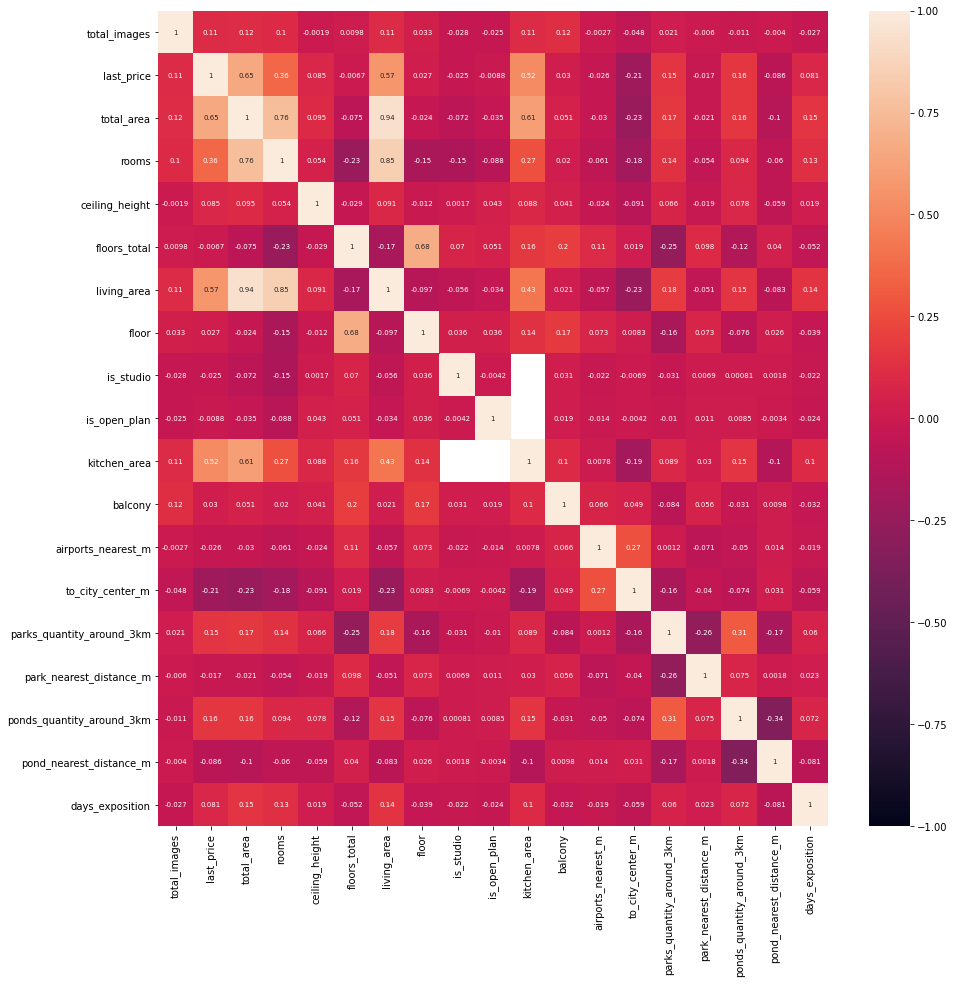

In [11]:
# построение heatmap для всего датасета
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(),
            annot=True,
            annot_kws={"size": 7},
            fmt='.2g', vmin=-1,
            vmax=1
           )

Исходя из общей тепловой карты, наиболее сильная зависимость проявляется:
- Для столбца `living_area` - от `last_price`, `total_area`, `rooms`, `kitchen_area`
- Для столбца `kitchen_area` - от тех же `last_price`, `total_area`, `rooms` и наоборот от `living_area`

В случае типа квартиры и ее планировки (столбцы `is_studio`, `is_open_plan`) - ячейки полностью белые. Предположу, что зависимость не определена точно.

Отметим, что в столбцах `last_price`, `total_area`, `rooms` пропусков нет.

На столбец `last_price` пока не обращаем внимания - в реальности бывают случаи, когда хорошая студия в нормальном ЖК может стоить больше сносной многокомнатной квартиры в не очень нормальном ЖК. Также помним, что в случае столбцов `is_studio`, `is_open_plan` тип данных - bool, зависимость не определена (на них я бы тоже внимания не обращал).

Поступим следующим образом:
- 1) В случае студий (`rooms` = 0) заполним значения `kitchen_area` нулями, а значения `living_area` приравняем к значениям `total_area`.
- 2) Заполним пропуски в столбце `living_area` разницей `total_area` и `kitchen_area`

In [12]:
# технический вывод названия столбцов, для подготовки функции
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest_m', 'to_city_center_m',
       'parks_quantity_around_3km', 'park_nearest_distance_m',
       'ponds_quantity_around_3km', 'pond_nearest_distance_m',
       'days_exposition'],
      dtype='object')

Алгоритм функции по заполнению пропусков в `kitchen_area`:
- 1) Выделяем срез из данных c количеством комнат = 0
- 2) Идем условным циклом по количеству комнат: если значение 0, то в срезе данных заполняем площадь кухни нулем, в иных случаях - заполняем пропуски во всем массиве медианным значением
- 3) Возвращаем предзаполненный срез обратно - таким образом по студиям занулится площадь кухни, по остальным квартирам пропуски заполнятся медианой.

In [13]:
# заполнение столбца kitchen_area по значениям в столбце rooms

# получение среза и медианы по всему столбцу
studios = data[data['rooms'] == 0]
kitchen_median = data['kitchen_area'].median()

# функция для заполнения пропусков
def kitchen_area_fill(rooms_stat):
    for rooms in rooms_stat:
        if rooms == 0:
            studios['kitchen_area'] = studios['kitchen_area'].fillna(0)
        else:
            data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_median)

# получение списка уникальных значений по количеству комнат            
rooms_stat = data['rooms'].unique()

# вызов функции и присвоение значений
kitchen_area_fill(rooms_stat)
data[data['rooms'] == 0] = studios

studios['kitchen_area'].isna().sum()

0

In [14]:
# проверка заполнения во всем датасете
data['kitchen_area'].isna().sum()

0

Пропуски в `kitchen_area` заполнили. Теперь можем заполнить пропуски в `living_area` разницей `total_area` и `kitchen_area` - таким образом сохраним связь столбцов между собой - сумма жилой и кухонной площади будет только равна общей площади по каждому объявлению никак не будет больше/меньше. Подозреваю, именно этот момент мог быть не учтен в первой версии кода.

In [15]:
# заполнение столбца living_area
data['living_area'] = data['living_area'].fillna(data['total_area'] - data['kitchen_area'])

In [16]:
# информация об обновленном датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_images               23565 non-null  int64  
 1   last_price                 23565 non-null  float64
 2   total_area                 23565 non-null  float64
 3   first_day_exposition       23565 non-null  object 
 4   rooms                      23565 non-null  int64  
 5   ceiling_height             14481 non-null  float64
 6   floors_total               23565 non-null  float64
 7   living_area                23565 non-null  float64
 8   floor                      23565 non-null  int64  
 9   is_apartment               2760 non-null   object 
 10  is_studio                  23565 non-null  bool   
 11  is_open_plan               23565 non-null  bool   
 12  kitchen_area               23565 non-null  float64
 13  balcony                    12090 non-null  flo

Отработаем п.4 заполнения пропусков - заполним нулями пропуски в столбцах по паркам и водоемам.

In [17]:
# заполнение столбцов parks_quantity_around_3km и ponds_quantity_around_3km нулем
data['parks_quantity_around_3km'] = data['parks_quantity_around_3km'].fillna(0)
data['ponds_quantity_around_3km'] = data['ponds_quantity_around_3km'].fillna(0)

Отработаем п.7 заполнения пропусков - заполним медианным значением пропуски в столбце со значением высоты потолков.

In [18]:
# заполнение столбца ceiling_height медианным значением
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

Отработаем п.8 заполнения пропусков - если количество балконов не указано, то, скорее всего, их нет (столбец заполнялся пользователями вручную).

In [19]:
# заполнение столбца balcony нулем
data['balcony'] = data['balcony'].fillna(0)

Отработаем п.11 заполнения пропусков - если не указана, что объект недвижимости является апартаментами, то, скорее всего, так и есть (столбец заполнялся пользователями вручную).

In [20]:
# заполнение столбца is_apartment значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [21]:
# информация об обновленном датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_images               23565 non-null  int64  
 1   last_price                 23565 non-null  float64
 2   total_area                 23565 non-null  float64
 3   first_day_exposition       23565 non-null  object 
 4   rooms                      23565 non-null  int64  
 5   ceiling_height             23565 non-null  float64
 6   floors_total               23565 non-null  float64
 7   living_area                23565 non-null  float64
 8   floor                      23565 non-null  int64  
 9   is_apartment               23565 non-null  bool   
 10  is_studio                  23565 non-null  bool   
 11  is_open_plan               23565 non-null  bool   
 12  kitchen_area               23565 non-null  float64
 13  balcony                    23565 non-null  flo

Как видим, тип данных в столбце `is_apartment` изменился на *bool* после заполнения.

### Изменение типов данных

**2.3** Отработаем п. 4 - 6 предварительных выводов.

Некорректные типы данных указаны в столбцах `first_day_exposition` (должен быть int), `floors_total`, `balcony`, `parks_quantity_around_3km`, `ponds_quantity_around_3km`, `days_exposition`, `last_price` (должны быть int). Дополнительно, суммы в столбце `last_price` приведем к тысячам

In [22]:
# замена типов данных в указанных столбцах
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['to_city_center_km'] =  (data['to_city_center_m'] / 1000).astype('int64', errors='ignore') # имеются пропуски, не заполнялись
data['parks_quantity_around_3km'] = data['parks_quantity_around_3km'].astype('int64')
data['ponds_quantity_around_3km'] = data['ponds_quantity_around_3km'].astype('int64')
data['days_exposition'] = data['days_exposition'].astype('int64', errors='ignore') # имеются пропуски, не заполнялись
data['last_price'] = (data['last_price'] / 1000).astype('int64')

In [23]:
# проверка изменения типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23565 non-null  int64         
 1   last_price                 23565 non-null  int64         
 2   total_area                 23565 non-null  float64       
 3   first_day_exposition       23565 non-null  datetime64[ns]
 4   rooms                      23565 non-null  int64         
 5   ceiling_height             23565 non-null  float64       
 6   floors_total               23565 non-null  int64         
 7   living_area                23565 non-null  float64       
 8   floor                      23565 non-null  int64         
 9   is_apartment               23565 non-null  bool          
 10  is_studio                  23565 non-null  bool          
 11  is_open_plan               23565 non-null  bool          
 12  kitc

**2.4** Отработаем п. 3 предварительных выводов.
Для удобства в будущем, изменим регистр в текстовом столбце `locality_name` и дополнительно изменим 'ё' на 'е'.

In [24]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest_m,to_city_center_m,parks_quantity_around_3km,park_nearest_distance_m,ponds_quantity_around_3km,pond_nearest_distance_m,days_exposition,to_city_center_km
0,20,13000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,16.028
1,7,3350,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,18.603
2,10,5196,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,13.933
3,0,64900,159.0,2015-07-24,3,2.65,14,149.9,9,False,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,6.800
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,8.098


**2.5** Произведем проверку на наличие явных дубликатов после заполнения таблицы.

In [25]:
data.duplicated().sum()

0

Явные дубликаты в данных отсутствуют. Идем дальше

### Вывод по предобработке

Датасет изучен и предобработан:
- Изменены названия столбцов
- Изучены столбцы с наличием пропусков в данных. Уместные заполнения выполнены и обоснованы
- Типы данных изменены на корректные
- Изменен регистр в текстовом столбце `locality_name` для удобства в будущем
- Дубликаты в данных отсутствуют

## Расчёты и добавление промежуточных результатов

**3.1** Для добавления стоимости квадратного метра понадобятся столбцы `last_price` и `total_area`.

In [26]:
# добавление стоимости квадратного метра
data['price_per_m2'] = data['last_price'] / data['total_area']
data['price_per_m2'] = data['price_per_m2'].round(2)

**3.2** Для добавления пояснения к этажу напишем функцию и применим ее методом .apply()

In [27]:
# подготовка функции для добавления столбца с пояснением этажа
def floor_describe(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [28]:
# применение функции по этажу
data['floor_describe'] = data.apply(floor_describe, axis=1)

**3.3** День недели, месяц и год публикации объявления добавим через методы datetime - тип данных в столбце `first_day_exposition` ранее приведен к datetime

In [29]:
# добавление дня недели, месяца и года даты публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.day_name()
data['exposition_month'] = data['first_day_exposition'].dt.month_name()
data['exposition_year'] = data['first_day_exposition'].dt.year

**3.4** Для добавления соотношений площадей: жилой и кухни к общей понадобятся столбцы `living_area`, `kitchen_area` и `total_area`.

In [30]:
# добавление соотношений
data['area_ratio_living_to_total'] = data['living_area'] / data['total_area']
data['area_ratio_living_to_total'] = data['area_ratio_living_to_total'].round(2)
data['area_ratio_kitchen_to_total'] = data['kitchen_area'] / data['total_area']
data['area_ratio_kitchen_to_total'] = data['area_ratio_kitchen_to_total'].round(2)

**3.5** Посмотрим на обновленный датасет с новыми столбцами

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 23565 non-null  int64         
 1   last_price                   23565 non-null  int64         
 2   total_area                   23565 non-null  float64       
 3   first_day_exposition         23565 non-null  datetime64[ns]
 4   rooms                        23565 non-null  int64         
 5   ceiling_height               23565 non-null  float64       
 6   floors_total                 23565 non-null  int64         
 7   living_area                  23565 non-null  float64       
 8   floor                        23565 non-null  int64         
 9   is_apartment                 23565 non-null  bool          
 10  is_studio                    23565 non-null  bool          
 11  is_open_plan                 23565 non-nu

In [32]:
# просмотр первых 10 значений
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,pond_nearest_distance_m,days_exposition,to_city_center_km,price_per_m2,floor_describe,exposition_weekday,exposition_month,exposition_year,area_ratio_living_to_total,area_ratio_kitchen_to_total
0,20,13000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,755.0,NaN,16.028,120.37,другой,Thursday,March,2019,0.47,0.23
1,7,3350,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,81.0,18.603,82.92,первый,Tuesday,December,2018,0.46,0.27
2,10,5196,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,574.0,558.0,13.933,92.79,другой,Thursday,August,2015,0.61,0.15
3,0,64900,159.00,2015-07-24,3,2.65,14,149.90,9,False,...,234.0,424.0,6.800,408.18,другой,Friday,July,2015,0.94,0.06
4,2,10000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48.0,121.0,8.098,100.00,другой,Tuesday,June,2018,0.32,0.41
5,10,2890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,55.0,NaN,95.07,другой,Monday,September,2018,0.47,0.30
6,6,3700,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,NaN,155.0,19.143,99.20,другой,Thursday,November,2017,0.28,0.39
7,5,7915,71.60,2019-04-18,2,2.65,24,52.70,22,False,...,NaN,NaN,11.634,110.54,другой,Thursday,April,2019,0.74,0.26
8,20,2900,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,189.0,NaN,87.45,другой,Wednesday,May,2018,0.47,0.27
9,18,5400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,289.0,15.008,88.52,другой,Sunday,February,2017,0.71,0.11


## Исследовательский анализ данных

**4.1** Изучаем параметры `total_area`, `last_price`, `rooms`, `ceiling_height`. Посмотрим на них отдельно.

In [33]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23565.000000,23565.000000,23565.000000,23565.000000
mean,60.322824,6540.042987,2.070656,2.724530
std,35.657060,10910.929793,1.078591,0.991026
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4646.000000,2.000000,2.650000
75%,69.700000,6790.000000,3.000000,2.700000
max,900.000000,763000.000000,19.000000,100.000000


**4.2** Построим гистограммы для каждого параметра

In [34]:
# функция для гистограммы
# строим графики в пределах Q1 - Q3, исключая выбросы

def hist_func(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    title_dict = {'total_area':'Параметр общей площади квартиры (в кв. м.)',
                 'last_price':'Параметр цены квартиры (в тыс. руб.)',
                 'rooms':'Параметр комнат в квартире (в шт.)',
                 'ceiling_height':'Параметр высоты потолков (в метрах)'}
    
    plot = data[column].plot(y=column, 
                             title=title_dict[column], 
                             kind='hist', 
                             bins=100, 
                             grid=True,
                             range=(Q1 - 3*IQR, Q3 + 3*IQR),
                            )
    
    return plot

<AxesSubplot:title={'center':'Параметр общей площади квартиры (в кв. м.)'}, ylabel='Frequency'>

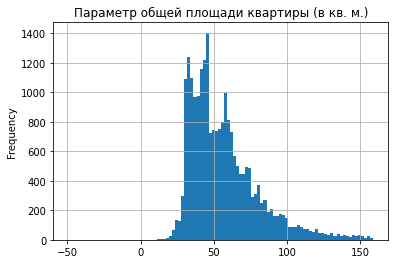

In [35]:
# гистограмма для значений total_area
hist_func(data, 'total_area')

Распределение очень похоже на нормальное, но не совсем "ровное". Было максимальное значение в 900 кв.м., но на фоне 50-100 кв.м. (почти 12 тыс. квартир и половина данных) оно не заметно - скорее всего, это вовсе выброс. На левый предел меньше 0 внимания не обращаем - площадь квартиры не может быть отрицательной.

<AxesSubplot:>

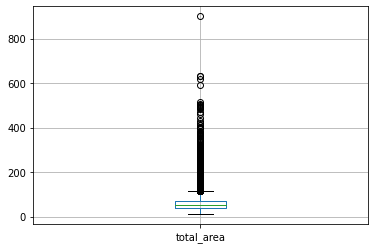

In [36]:
# boxplot для значений total_area
data.boxplot('total_area')

Аномальные значения начали проявляться примерно на 150 кв. м. Эти значения довольно редки для обычных квартир для обычных граждан, поэтому считаем, что это выбросы.

<AxesSubplot:title={'center':'Параметр цены квартиры (в тыс. руб.)'}, ylabel='Frequency'>

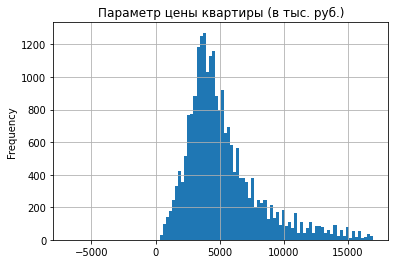

In [37]:
# гистограмма для значений last_price
hist_func(data, 'last_price')

Распределение не является нормальным. Большинство значений не превышает 10 млн руб. - это объяснятеся медианой в 4,64 млн руб. Было максимальное значение в 763 млн руб. - такая цена возможна в реальности, но на фоне остальных данных - это скорее всего выброс. На левый предел меньше 0 внимания не обращаем - цена квартиры не может быть отрицательной.

<AxesSubplot:>

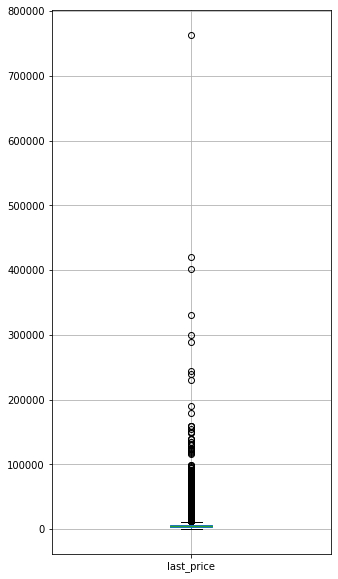

In [38]:
# boxplot для значений last_price
data.boxplot('last_price', figsize=(5, 10))

Действительно, аномальные значения пошли выше примерно 10 млн руб. Все что уже больше 10 млн руб., обычные  граждане вряд ли покупают, поэтому считаем эти значения выбросами.

<AxesSubplot:title={'center':'Параметр комнат в квартире (в шт.)'}, ylabel='Frequency'>

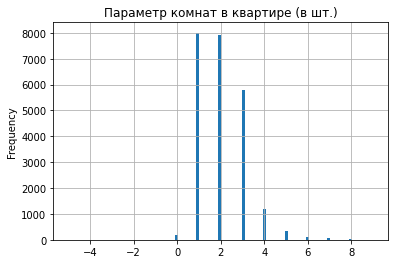

In [39]:
# гистограмма для значений rooms
hist_func(data, 'rooms')

Распределение похоже на нормальное. Среднее и медианное значения очень близки - в среднем и очень часто выставляют на продажу квартиры от 1 до 3 комнат. Есть максимальное значение в 19 комнат - такое возможно в реальности (если собственник захотел выкупить целый этаж, либо это пентхаус), но на общем фоне - скорее всего, выброс. На левый предел меньше 0 внимания не обращаем - цена квартиры не может быть отрицательной.

<AxesSubplot:>

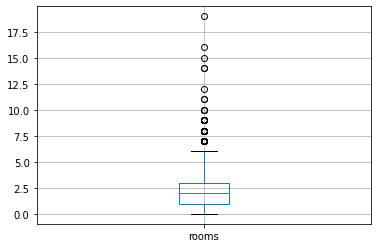

In [40]:
data.boxplot('rooms')

Считаем выбросами все квартиры, в которых больше 7 комнат. Очень большая вероятность, что это объединенные коммуналки (а не обычные квартиры)

<AxesSubplot:title={'center':'Параметр высоты потолков (в метрах)'}, ylabel='Frequency'>

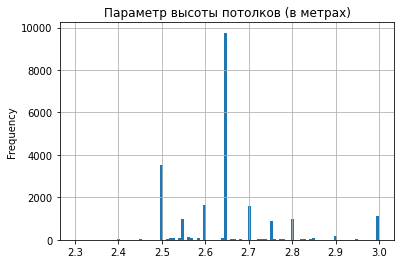

In [41]:
# гистограмма для значений ceiling_height
hist_func(data, 'ceiling_height')

Ранее пропуски по этому столбцу были заполнены медианным значением. Большинство значений находится в адекватных пределах - 2,8 м. Было максимальное значение высоты потолка в 100 метров - выбивается из реальности. Можно уверенно предположить, что это выброс.

<AxesSubplot:>

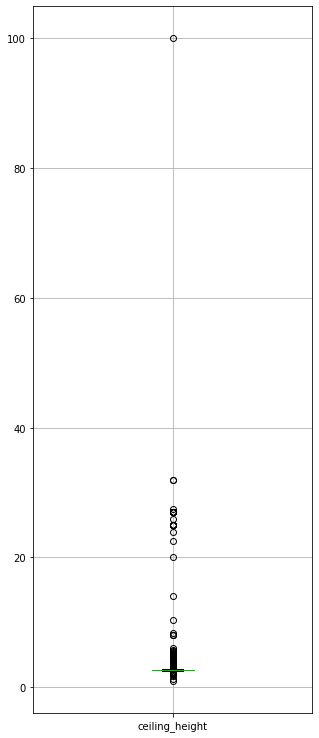

In [42]:
# boxplot для значений ceiling_height
data.boxplot('ceiling_height', figsize=(5, 13))

Считаем выбросами все значения больше 4 метров.

**4.3** Исследуем время продажи квартиры. Данные по дням, в течение которых объявления были размещены, содержатся в столбце `days_exposotion`. Ранее в предобработке пропуски не были заполнены.

In [43]:
# просмотр статистической информации о столбце
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

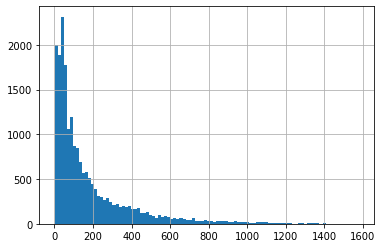

In [44]:
# построение гистограммы
data['days_exposition'].hist(bins=100)

Есть аномальное значение в 5 лет. В среднем, кваритиры продают за полгода (180 дней), чаще всего - в пределах 3-х месяцев (95 дней), срок вполне реальный. Построим диаграмму размаха.

<AxesSubplot:>

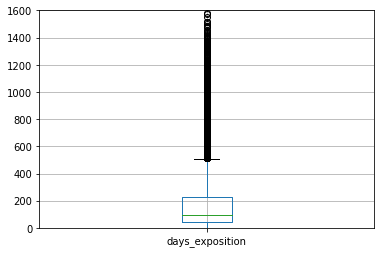

In [45]:
# построение boxplot
plt.ylim(0, 1600)
data.boxplot('days_exposition')

Вполне вероятно, что после фактической продажи объявление не было закрыто собственником (ушел в эйфорию, переехал и забыл и т.д.). Ограничим срок продажи примерно 500 днями и посмотрим на срез данных

<AxesSubplot:>

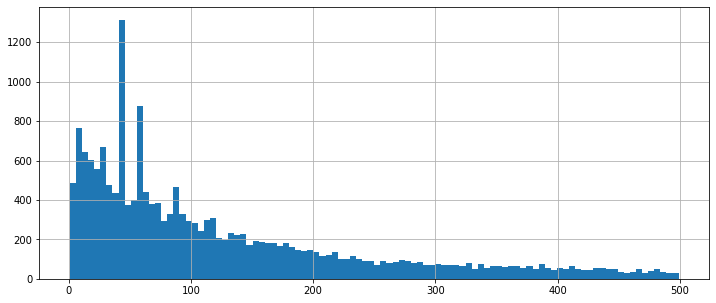

In [46]:
# получение среза данных
data.query('days_exposition < 500')['days_exposition'].hist(bins=100, figsize=(12, 5))

В срезе данных картина сильно не изменилась. Квартиры продают в среднем за 45-60 дней. Посмотрим на этот срез еще ближе

<AxesSubplot:>

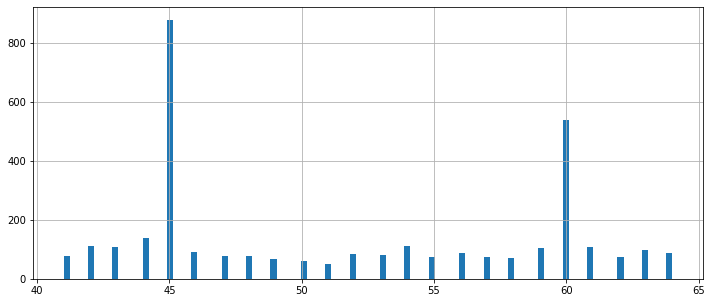

In [47]:
data.query('40 < days_exposition < 65')['days_exposition'].hist(bins=100, figsize=(12, 5))

Очень странные пики именно на 45 и 60 днях. Возможно, на этот срок настроено автоматическое снятие объявлений с публикации, если они никак не обновляются. Проверим гипотезу, что такая автоматическая проверка может быть раз в 15 дней (срез от 0 до 30)

<AxesSubplot:>

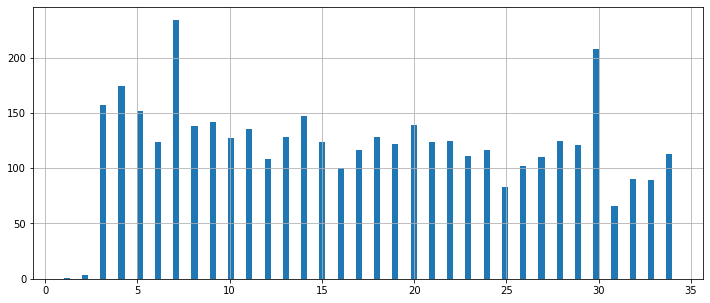

In [48]:
data.query('0 < days_exposition < 35')['days_exposition'].hist(bins=100, figsize=(12, 5))

Гипотеза частично подтвердилась. На 30 днях тоже виден резкий пик на фоне остальных, пик на 15 днях не наблюдается.

**Вывод:** можно уверенно предположить, что большинство квартир в этом срезе продается в пределах 60 дней от дня публикации. Все что больше 60 дней (2 месяца) - можно отнести к долгому времени продажи

Основываяюсь на анализе выбросов, получим новый датасет без их учета.

Чтобы сохранить больше данных для анализа и не удалить слишком много, не учитываем в `query` параметр по количеству дней размещения объявления.

In [49]:
# получение очищенного от выбросов датасета
df_filtered = data.query('total_area < 150 and rooms <= 7 and last_price <= 10000 and ceiling_height <= 4')
df_filtered.info()
df_filtered.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20812 entries, 1 to 23698
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 20812 non-null  int64         
 1   last_price                   20812 non-null  int64         
 2   total_area                   20812 non-null  float64       
 3   first_day_exposition         20812 non-null  datetime64[ns]
 4   rooms                        20812 non-null  int64         
 5   ceiling_height               20812 non-null  float64       
 6   floors_total                 20812 non-null  int64         
 7   living_area                  20812 non-null  float64       
 8   floor                        20812 non-null  int64         
 9   is_apartment                 20812 non-null  bool          
 10  is_studio                    20812 non-null  bool          
 11  is_open_plan                 20812 non-nu

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_quantity_around_3km,park_nearest_distance_m,ponds_quantity_around_3km,pond_nearest_distance_m,days_exposition,to_city_center_km,price_per_m2,exposition_year,area_ratio_living_to_total,area_ratio_kitchen_to_total
count,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,...,20812.000000,6295.000000,20812.000000,7280.000000,18326.000000,15369.000000,20812.000000,20812.000000,20812.000000,20812.000000
mean,9.650971,4644.917019,52.029703,1.899721,2.665357,10.738612,30.809129,5.854123,9.322572,0.588555,...,0.403325,486.515806,0.510955,533.907418,170.664575,15.218316,90.776185,2017.391265,0.582444,0.189942
std,5.502559,1964.661660,17.594683,0.892839,0.167813,6.616357,13.554007,4.887525,3.573768,0.928354,...,0.693971,321.477193,0.813800,277.390638,208.231291,8.544697,28.874103,1.014974,0.119876,0.074332
min,0.000000,12.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,16.000000,1.000000,0.208000,0.110000,2014.000000,0.040000,0.000000
25%,6.000000,3300.000000,38.700000,1.000000,2.600000,5.000000,18.300000,2.000000,7.000000,0.000000,...,0.000000,289.500000,0.000000,317.750000,43.000000,10.876000,73.750000,2017.000000,0.500000,0.140000
50%,9.000000,4300.000000,48.000000,2.000000,2.650000,9.000000,29.500000,4.000000,9.000000,0.000000,...,0.000000,456.000000,0.000000,522.000000,90.000000,13.797000,91.700000,2017.000000,0.580000,0.180000
75%,13.000000,5800.000000,62.000000,3.000000,2.650000,16.000000,39.522500,8.000000,10.700000,1.000000,...,1.000000,612.000000,1.000000,743.250000,216.750000,16.802000,107.840000,2018.000000,0.660000,0.240000
max,39.000000,10000.000000,147.800000,6.000000,4.000000,60.000000,130.700000,33.000000,64.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,65.968000,312.240000,2019.000000,1.000000,0.790000


**4.4** Посмотрим на зависимость цены от таких факторов, как:
- площадь (столбец `total_area`)
- количество комнат (столбец `rooms`)
- удаленность от центра (столбец `to_city_center_km`)
- этажность (столбец `floors`)
- дата размещения (день недели `exposition_weekday`, месяц `exposition_month`, год `exposition_year`)

In [50]:
# создание функции для построения графиков зависимости
# цены квартиры от различных параметров
def dependence_plot(df, column):

    title_dict = {'total_area':'Зависимость цены от общей площади квартиры',
                  'rooms':'Зависимость цены квартиры от количества комнат',
                  'to_city_center_km':'Зависимость цены квартиры от удаленности от центра города',
                  'floor':'Зависимость цены квартиры от этажа',
                  'exposition_weekday':'Зависимость цены квартиры от дня недели размещения объявления',
                  'exposition_month':'Зависимость цены квартиры от месяца размещения объявления',
                  'exposition_year':'Зависимость цены квартиры от года размещения объявления',
                 }
    
    if column == 'exposition_weekday' or column == 'exposition_month' or column == 'exposition_year':
        dependence_plot =  (df.pivot_table(index=column, values='last_price', aggfunc='median')
                           .plot(kind='bar',
                                 title=title_dict[column],
                                 figsize=(10, 10)
                                )
                           )
        
    else:    
        dependence_plot = df.plot(title=title_dict[column], 
                                  kind='scatter',
                                  y='last_price',
                                  x=column,
                                  figsize=(10, 10),
                                 )
    return dependence_plot

<AxesSubplot:title={'center':'Зависимость цены от общей площади квартиры'}, xlabel='total_area', ylabel='last_price'>

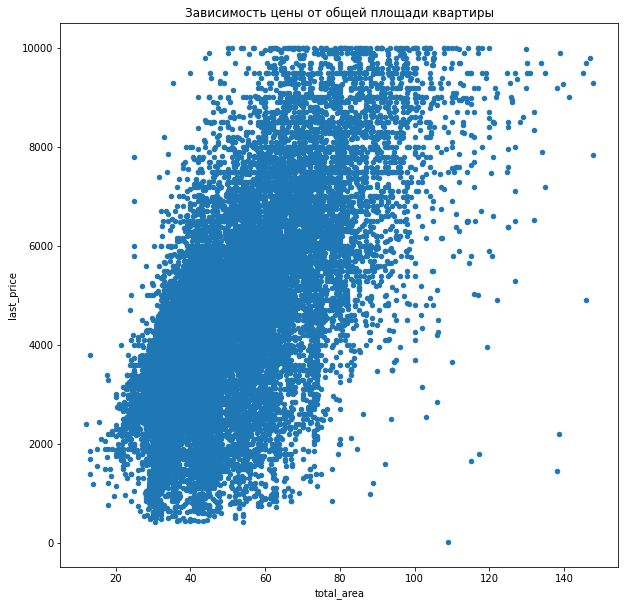

In [51]:
# зависимость цены от общей площади
dependence_plot(df_filtered, 'total_area')

Цена растет пропорционально площади. Вывод ожидаемый. Зависимость очень похожа на линейную.

<AxesSubplot:title={'center':'Зависимость цены квартиры от количества комнат'}, xlabel='rooms', ylabel='last_price'>

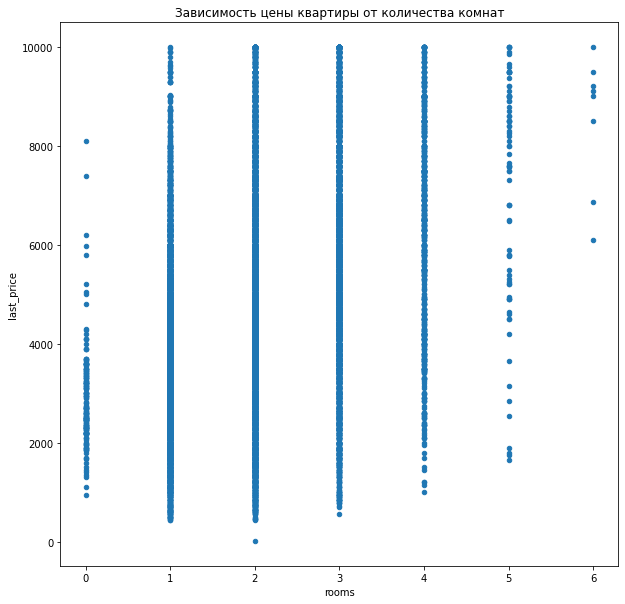

In [52]:
# зависимость цены от количества комнат
dependence_plot(df_filtered, 'rooms')

Цена также растет пропорционально количеству комнат в квартире.

<AxesSubplot:title={'center':'Зависимость цены квартиры от удаленности от центра города'}, xlabel='to_city_center_km', ylabel='last_price'>

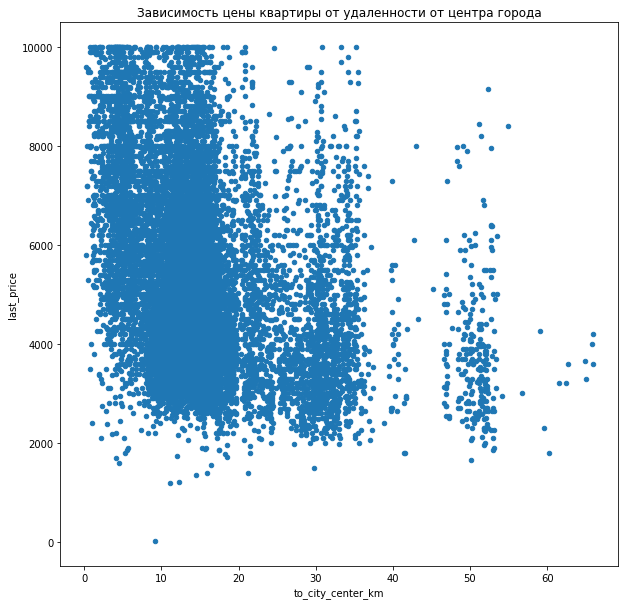

In [53]:
# зависимость цены от удаленности от центра
dependence_plot(df_filtered, 'to_city_center_km')

Вывод также ожидаемый. В центре города квартиры самые дорогие, за пределами города цены меньше минимум в 2 раза.

<AxesSubplot:title={'center':'Зависимость цены квартиры от этажа'}, xlabel='floor', ylabel='last_price'>

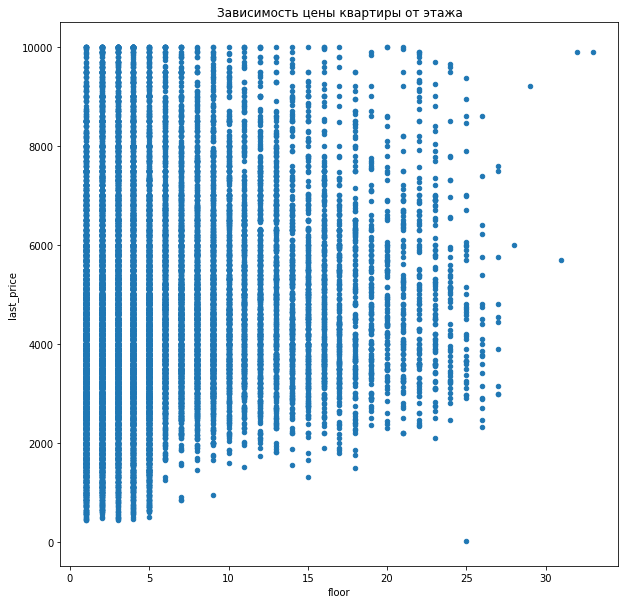

In [54]:
# зависимость цены от этажа
dependence_plot(df_filtered, 'floor')

Цены на 1-ом этаже бывают ниже цен квартир, расположенных на этажах выше. Самые дорогие варианты (4 варианта) расположены на 30+ этажах - конкретно в СПб это могут быть 2 ЖК: "Князь Алекскандр Невский" и "Петр Великий".

**4.5** Изучим зависимость цены от времени размещения объявления

<AxesSubplot:title={'center':'Зависимость цены квартиры от дня недели размещения объявления'}, xlabel='exposition_weekday'>

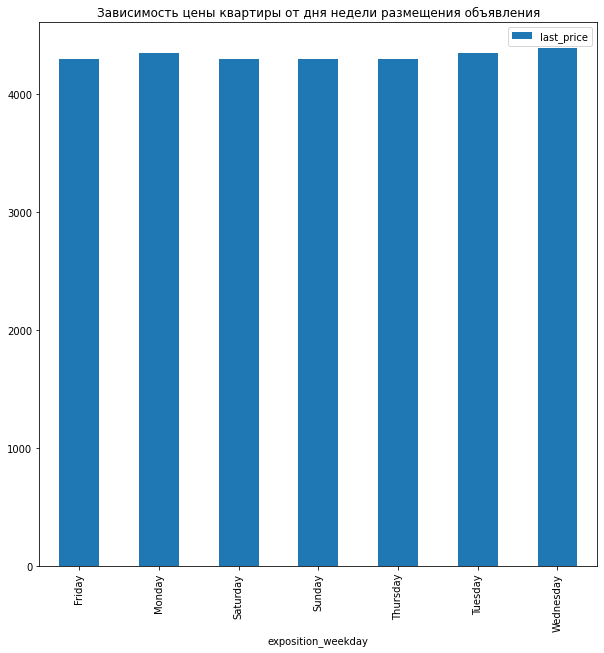

In [55]:
# зависимость цены от дня недели размещения объявления
dependence_plot(df_filtered, 'exposition_weekday')

<AxesSubplot:title={'center':'Зависимость цены квартиры от месяца размещения объявления'}, xlabel='exposition_month'>

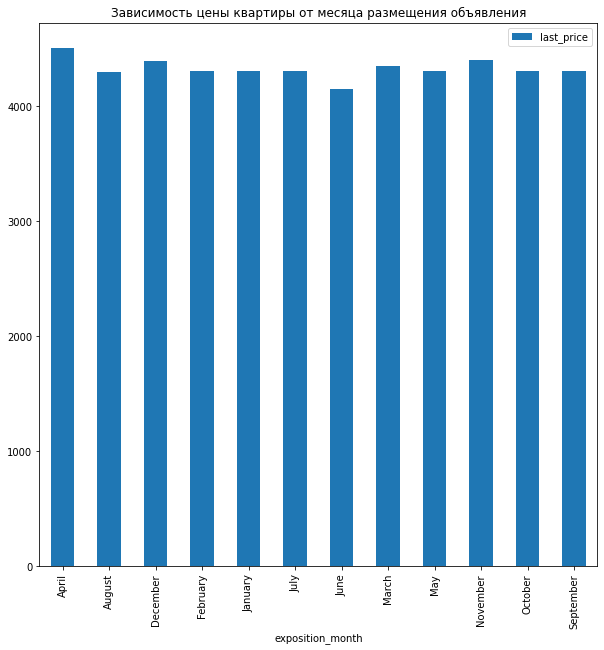

In [56]:
# зависимость цены от месяца размещения объявления
dependence_plot(df_filtered, 'exposition_month')

<AxesSubplot:title={'center':'Зависимость цены квартиры от года размещения объявления'}, xlabel='exposition_year'>

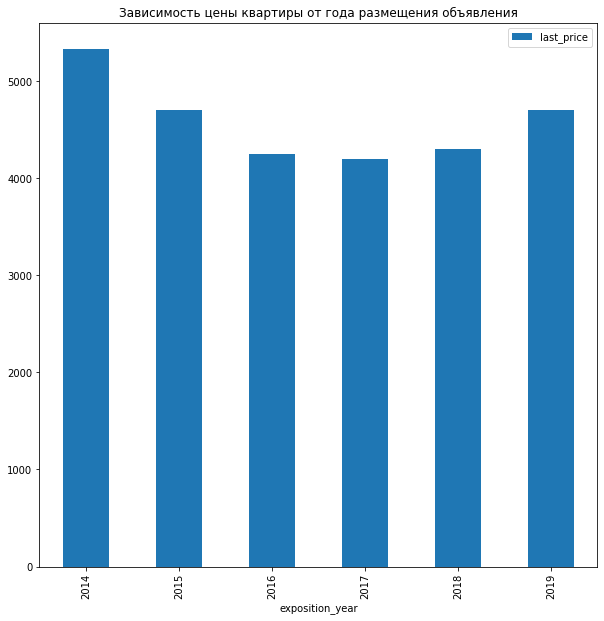

In [57]:
# зависимость цены от года размещения объявления
dependence_plot(df_filtered, 'exposition_year')

Как видим, сильной зависимости от месяца размещения нет.
- В случае дня, средние цены в будние дни чуть выше, чем в выходные;
- В случае года, самая высокая средняя цена была в 2014 году, история представлена за период 2014-2019 годы. Можно предположить, что в 2015-2018 г. граждане не особо активно покупали жилье по причине высоких процентов по ипотеке и геополитического кризиса.Те, кто хотел и имел деньги, скупали квартиры в 2014 году в опасении снижения рубля (спрос был выше предложения). Посмотрим чуть детальнее на 2014 год.

In [58]:
# посмотрим, за какие месяцы 2014 года представлены данные
df_filtered[df_filtered['exposition_year'] == 2014]['exposition_month'].unique()

array(['December', 'November'], dtype=object)

Действительно, в данных по 2014 году есть объявления только в конце года - за 2 последних месяца. Начиная с 2018 года, спрос на квартиры начал восстанавливаться.

Визуализируем зависимость цены квартиры от различных параметров в виде тепловой карты

<AxesSubplot:>

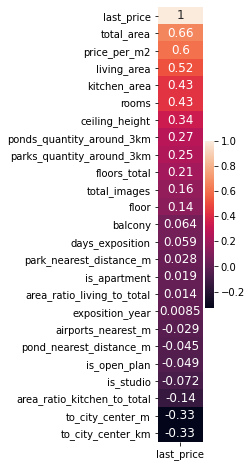

In [59]:
# построенине heatmap для оценки влияния цены квартиры от различных параметров
plt.figure(figsize=(1,8))
sns.heatmap(df_filtered.corr()[['last_price']].sort_values(by='last_price', ascending=False), 
            annot=True, annot_kws={'size':12})

Как видим, сильнее всего на цену квартиры влияют (по убыванию):
- 1) общая площадь и цена за кв. метр - вполне ожидаемо и соответствует реальности;
- 2) Жилая площадь и площадь кухни, а также количество комнат;
- 3) Высота потолков - возможно, это квартиры в центре и в домах, которые являются историческими;
- 4) В небольшой степени - количество парков и водоемов;
- 5) Расстояние до центра города - ожидаемо. Чем ближе квартира к центру, тем квартира дороже (исходя из значения < 0).

**4.5** Посмотрим 10 самых крупных населенных пунктов. Рассчитаем среднюю стоимость за квадратный метр.

In [60]:
# вывод сводной таблицы по населенным пунктам
df_filtered_per_price = (df_filtered.pivot_table(index='locality_name', values='price_per_m2', aggfunc='median')
                         .sort_values(by='price_per_m2', ascending=False))
df_filtered_per_price.head(10)

,price_per_m2
locality_name,
санкт-петербург,101.220
кудрово,99.780
зеленогорск,98.595
пушкин,98.040
сестрорецк,97.530
поселок левашово,97.000
деревня кудрово,91.800
поселок парголово,91.780
мурино,91.470


<AxesSubplot:xlabel='locality_name'>

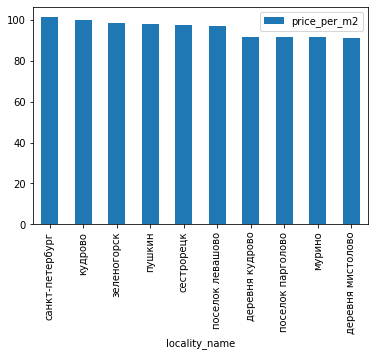

In [61]:
# динамика цены квартир в зависимости от местоположения
df_filtered_per_price.sort_values(by='price_per_m2', ascending=False).head(10).plot(kind='bar')

Самая высокая средняя цена за кв.метр, ожидаемо, оказалась в Санкт-Петербурге.

In [62]:
# просмотр населенных пунктов с самым дешевым жильем
df_filtered_per_price.tail(10)

,price_per_m2
locality_name,
деревня ям-тесово,13.710
деревня сижно,13.710
деревня бор,13.160
поселок тесово-4,12.930
деревня малая романовка,12.720
поселок совхозный,12.630
деревня выскатка,12.335
деревня вахнова кара,11.690
поселок станции свирь,11.480


Самое дешевое жилье есть в деревне Старополье. Скорее всего, это совсем маленький поселок, а возможно и вымирающий со временем.

**4.5** Изучим срез данных только по Санкт-Петербургу

In [63]:
# получение среза по Санкт-Петербургу
df_spb = df_filtered.query('locality_name == "санкт-петербург"')
df_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13019 entries, 2 to 23694
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 13019 non-null  int64         
 1   last_price                   13019 non-null  int64         
 2   total_area                   13019 non-null  float64       
 3   first_day_exposition         13019 non-null  datetime64[ns]
 4   rooms                        13019 non-null  int64         
 5   ceiling_height               13019 non-null  float64       
 6   floors_total                 13019 non-null  int64         
 7   living_area                  13019 non-null  float64       
 8   floor                        13019 non-null  int64         
 9   is_apartment                 13019 non-null  bool          
 10  is_studio                    13019 non-null  bool          
 11  is_open_plan                 13019 non-nu

Для определения центральной зоны необходимо: 
- перевести значения в километры и привести к целым значениям
- получить сводную таблицу по стоимости за квадратный метр и общей стоимости квартиры, в зависимости от удаленности от центра
- построить график зависимости цены квартиры от удаленности от центра. Резкое изменение цены на определенном километре выступит границей центра города 

In [64]:
# получение сводной таблицы по расстояниям от центра
df_spb['to_city_center_km'] = df_spb['to_city_center_km'].round(0)

df_spb_km_to_center = (df_spb.groupby('to_city_center_km')
                       .agg({'price_per_m2':'median', 'last_price':'median'}))

df_spb_km_to_center.head(10)

,price_per_m2,last_price
to_city_center_km,,
0.0,100.00,7200.0
1.0,110.33,7985.0
2.0,109.17,7735.0
3.0,102.04,6900.0
4.0,108.14,7080.0
5.0,113.33,7050.0
6.0,115.30,6596.0
7.0,111.90,6150.0
8.0,111.45,5951.0


<AxesSubplot:xlabel='to_city_center_km'>

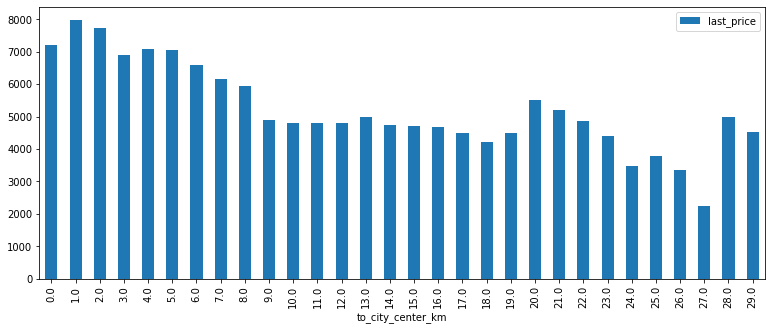

In [65]:
# построение графика зависимости цены от удаленности от центра
df_spb_km_to_center.plot(y='last_price', kind='bar', figsize=(13, 5))

Судя по графику, резкое изменение в меньшую сторону (и не возвращается на прежний уровень в дальнейшем) происходит на 9-м километре от центра. В районе 20 километра стоимость снова растет - это можно объяснить тем, что новое жилье в больших городах (и СПб в том числе) строится ближе к окраинам.

Ограничим границу центральной зоны до 9 км.

**4.6** Проанализируем квартиры в центре Санкт-Петербурга.

Ранее граница центральной зоны была ограничена 9 км. Получим нужный срез данных и будем работать с ним.

In [66]:
df_spb_center = df_spb.query('to_city_center_km < 9')
df_spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2397 entries, 4 to 23694
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   total_images                 2397 non-null   int64         
 1   last_price                   2397 non-null   int64         
 2   total_area                   2397 non-null   float64       
 3   first_day_exposition         2397 non-null   datetime64[ns]
 4   rooms                        2397 non-null   int64         
 5   ceiling_height               2397 non-null   float64       
 6   floors_total                 2397 non-null   int64         
 7   living_area                  2397 non-null   float64       
 8   floor                        2397 non-null   int64         
 9   is_apartment                 2397 non-null   bool          
 10  is_studio                    2397 non-null   bool          
 11  is_open_plan                 2397 non-null

Изучим параметры:
- площадь квартиры (столбец `total_area`);
- цена (столбец `last_price`);
- количество комнат (столбец `rooms`);
- высота потолков (столбец `ceiling_height`).

Имеет смысл выделить их отдельно в и этом случае построить матрицу корреляции.

In [67]:
# получение таблицы корреляций по изучаемым параметрам
df_spb_center_1 = df_spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']]
df_spb_center_1.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.691305,0.809208,0.266661
last_price,0.691305,1.000000,0.473075,0.247443
rooms,0.809208,0.473075,1.000000,0.207036
ceiling_height,0.266661,0.247443,0.207036,1.000000


array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>],
       [<AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='rooms'>],
       [<AxesSubplot:xlabel='total_area', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='last_price', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='rooms', ylabel='ceiling_height'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel=

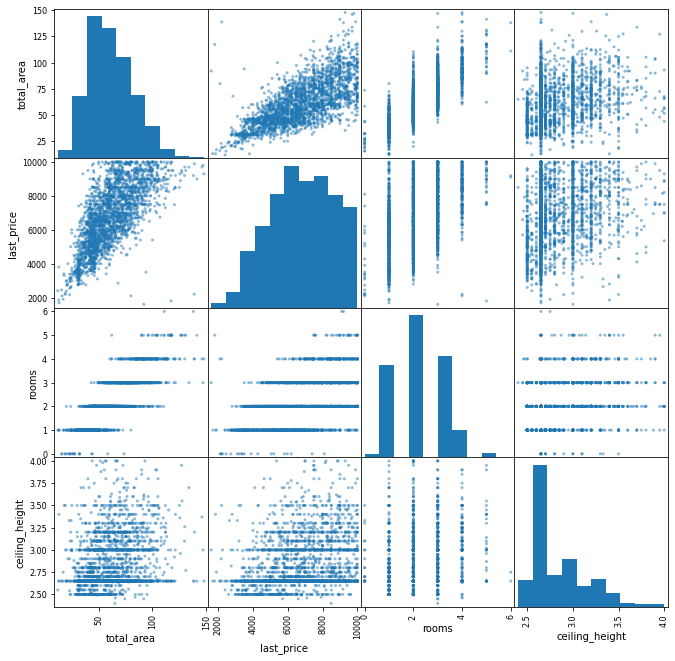

In [68]:
# построение матрицы корреляций
pd.plotting.scatter_matrix(df_spb_center_1, figsize=(11, 11))

Исходя из матрицы корреляций, можно сделать выводы:
- Параметры по цене, площади и количеству комнат сильно связаны между собой. При росте площади и количества комнат пропорционально увеличивается цена квартиры, при увеличении общей площади квартиры увеличивается количество комнат (что совпадает с реальностью);
- Высота потолков не сильно влияет на цену квартиры. Говоря про СПб, наценка возможна из-за историчности какого-либо здания. В центре СПб очень немного новых зданий. Также высота потолков почти не связана с общей площадью и количеством комнат.

**4.7** Изучим факторы, влияющие на цену квартиры в центре:
- число комнат (столбец `rooms`)
- этаж (столбец `floor`)
- удаленность от центра (столбец `to_city_center_km`)
- даты публикации объявления (столбец `first_day_exposition`)

In [69]:
# построение таблиц корелляций по данным в центре СПб и по всему городу
df_spb_center_2 = df_spb_center[['last_price', 'rooms', 'floor', 'to_city_center_km']]
display(df_spb_center_2.corr())
display(df_spb[['last_price', 'rooms', 'floor', 'to_city_center_km']].corr())

,last_price,rooms,floor,to_city_center_km
last_price,1.000000,0.473075,0.084464,-0.211967
rooms,0.473075,1.000000,-0.175821,-0.207125
floor,0.084464,-0.175821,1.000000,0.269408
to_city_center_km,-0.211967,-0.207125,0.269408,1.000000


,last_price,rooms,floor,to_city_center_km
last_price,1.000000,0.512559,0.048110,-0.334300
rooms,0.512559,1.000000,-0.201005,-0.133625
floor,0.048110,-0.201005,1.000000,0.216942
to_city_center_km,-0.334300,-0.133625,0.216942,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='to_city_center_km', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms'>,
        <AxesSubplot:xlabel='to_city_center_km', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='floor'>,
        <AxesSubplot:xlabel='rooms', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='to_city_center_km', ylabel='floor'>],
       [<AxesSubplot:xlabel='last_price', ylabel='to_city_center_km'>,
        <AxesSubplot:xlabel='rooms', ylabel='to_city_center_km'>,
        <AxesSubplot:xlabel='floor', ylabel='to_city_center_km'>,
        <AxesSubplot:xlabel='to_city_center_km', ylabel='to_city_center_km'

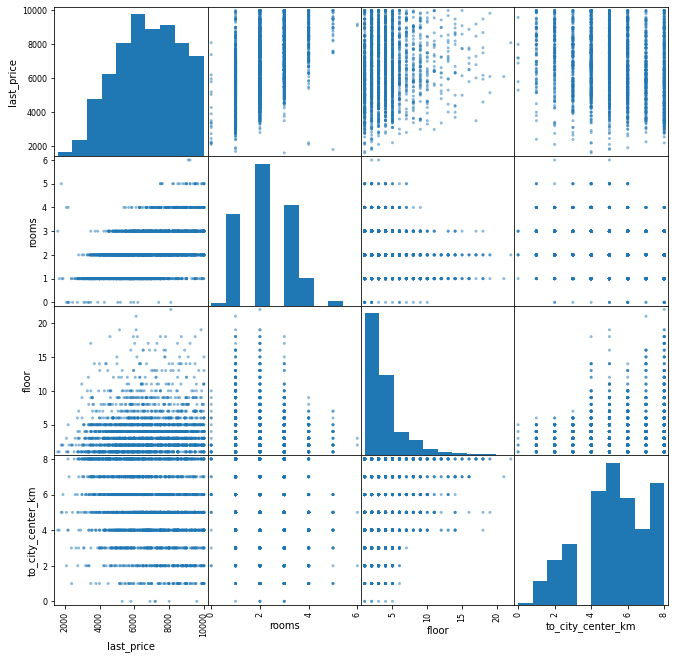

In [70]:
# построение матрицы корреляций по данным в центре СПб
pd.plotting.scatter_matrix(df_spb_center_2, figsize=(11, 11))

Удаленность конкретной квартиры от центра и этаж почти не влияют на стоимость квартиры. В случае удаленности от центра - в этом случае можно перемещаться пешком или максимум на общественном транспорте, поэтому на стоимость квартиры параметр не сильно влияет. В случае этажа - в реальности, в большинстве домов 1 этажи являются коммерческими, также на любом этаже будет заметен шум города, этим можно объяснить слабую связь цены и этажа.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='to_city_center_km', ylabel='last_price'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms'>,
        <AxesSubplot:xlabel='to_city_center_km', ylabel='rooms'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='floor'>,
        <AxesSubplot:xlabel='rooms', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='to_city_center_km', ylabel='floor'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='floor'>],
       [<AxesSubplot:xlabel='last_price', ylabel='to_city_center_km'>,
        <Axes

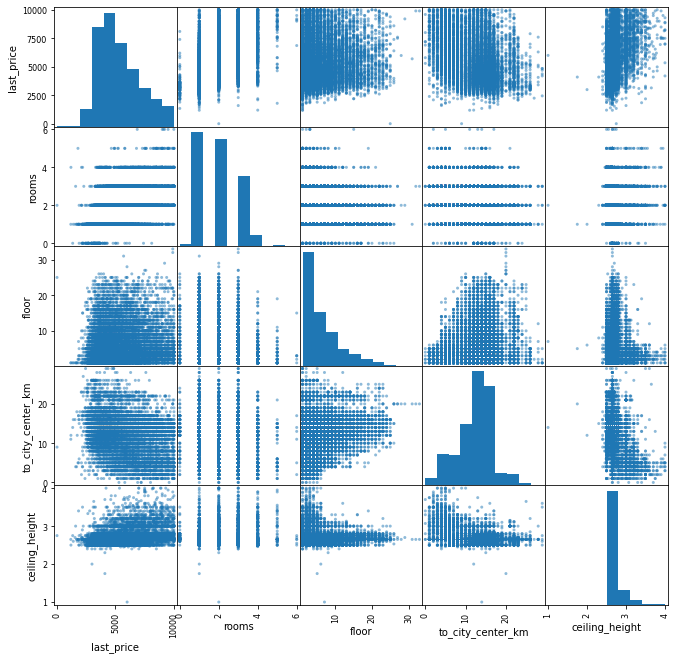

In [71]:
# построение матрицы корреляций по всему городу
pd.plotting.scatter_matrix(df_spb[['last_price', 'rooms', 'floor', 'to_city_center_km', 'ceiling_height']], figsize=(11, 11))

По сравнению со всем городом:
- в центре характерны более высокие потолки при меньшей этажности зданий
- в центре распространены малокомнатные варианты квартир
- в центре этаж не так сильно влияет на стоимость квартиры. Чем выше этаж в остальном городе, тем цена меньше

<AxesSubplot:title={'center':'Зависимость цены квартиры от дня недели размещения объявления'}, xlabel='exposition_weekday'>

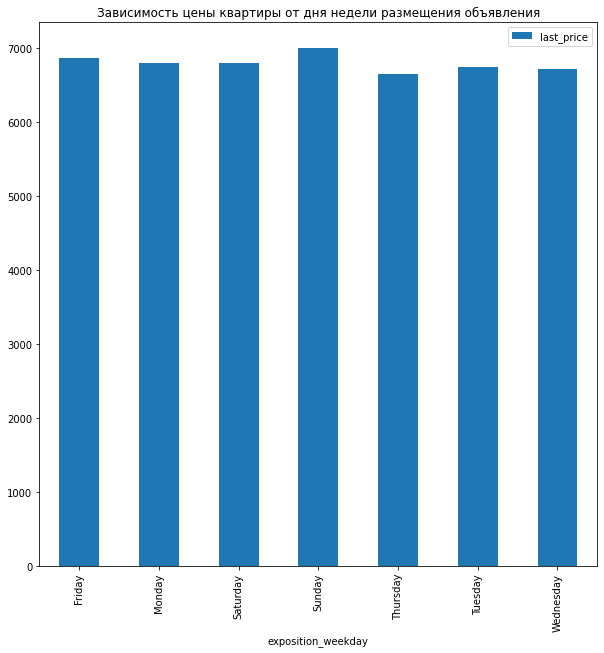

In [72]:
# получение графика по дню размещения объявления
dependence_plot(df_spb_center, 'exposition_weekday')

В случае с центром города, наиболее высокие цены на жилье предлагают в выходной день (воскресенье). В целом по городу наиболее высокие цены предлагают в будни.

<AxesSubplot:title={'center':'Зависимость цены квартиры от месяца размещения объявления'}, xlabel='exposition_month'>

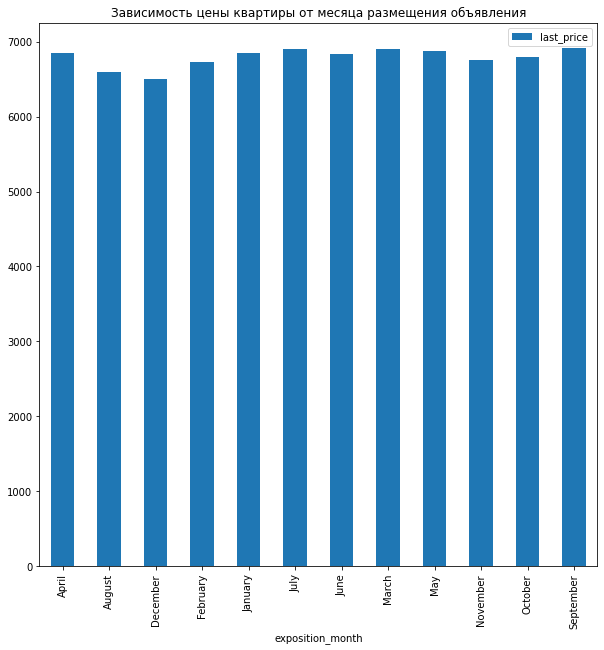

In [73]:
# получение графика по месяцу размещения объявления
dependence_plot(df_spb_center, 'exposition_month')

В случае месяца, минимальная цена на фоне всех остальных наблюдается в декабре.

<AxesSubplot:title={'center':'Зависимость цены квартиры от года размещения объявления'}, xlabel='exposition_year'>

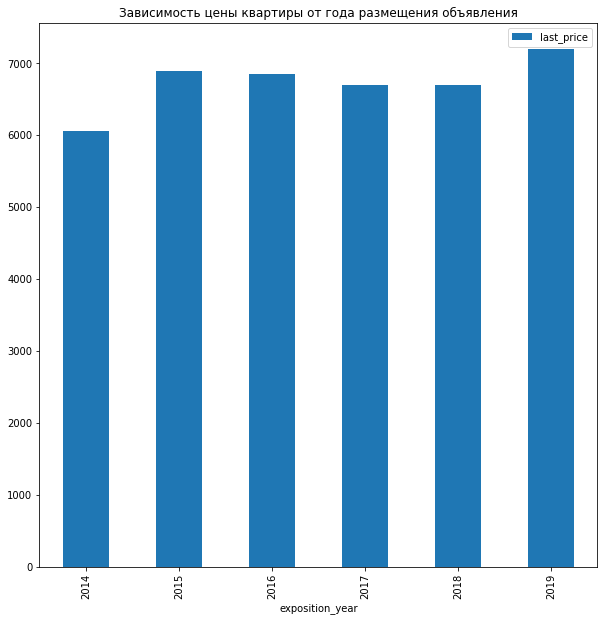

In [74]:
# получение графика по году размещения объявления
dependence_plot(df_spb_center, 'exposition_year')

В случае года, можно сделать вывод, что квартиры в центре не теряли актуальности и спрос оставался стабильным на фоне всего города (упал в период 2015-2018 г.). Можно предположить, что богатые граждане не потеряли своей платежеспособности и продолжили покупать квартиры.

## Общий вывод

В рамках проекта исследованы объявления о продаже квартир в регионе Санкт-Петербурга в период 2015-2019 гг., выгруженные из Яндекс.Недвижимости.

Данные предобработаны: устранены пропуски в уместных местах, выполнены переимнования столбцов. Дубликаты отсутствуют. Посчитаны и добавлены новые значения: по части соотношения жилой площади и кухни к общей; средней цене за квадратный метр.

Изучены характерные параметры объявлений о продаже, убраны аномальные и выбивающиеся значения. Проведена аналитика по ключевым факторам, влияющим на стоимость квартиры, в пределах всего региона и отдельно СПб. Ключевые выводы:
- В среднем, стоимость квартир в Санкт-Петербурге выше, чем в его окрестностях и ближайших населенных пунктах;
- В большей степени влияют на стоимость квартиры такие параметры, как площадь и количество комнат;
- Высокоэтажный жилой фонд с большим количеством комнат в СПб возводится за пределами центра, ближе к окраинам города. В центре сосредоточен старый жилой фонд с относительно невысокой этажностью и небольшим количеством комнат;
- Актуальность жилья в центре остается стабильной, по сравнению с остальным жильем в черте города;
- Касательно времени продажи квартир: большинство продаетая в пределах 2-х месяцев, остальное считается долгой продажей. Часть объявлений, попавших в категорию долгих, неактуальна - собственник мог не закрыть его самостоятельно. Стоит автоматизировать удаление неактуальных объявлений - например, если оно не обновлялось 45-60 дней, удалять его автоматически.